# Εργαστηριακή Άσκηση 3. Βαθιά Μάθηση. 
## Cifar-100 Classification
Περιβάλλον - Google Colab

Ημερομηνία παράδοσης της άσκησης: 28 Φεβρουαρίου 2020



# Στοιχεία Ομάδας

**Αριθμός Ομάδας:** 66

**Ονοματεπώνυμα και ΑΜ:**

Τσιλιβής Θεόδωρος 03116032

Στόικου Θεοδότη 03117085

Ποταμίτου Νεφέλη 03117709

# Βαθιά μάθηση στο CIFAR-100

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με ένα μοναδικό ξεχωριστό υποσύνολο του CIFAR-100
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό της ομάδας σας.

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 66

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number( classes_number = 80 )

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

['apple', ' aquarium_fish', ' baby', ' bear', ' beaver', ' bed', ' bee', ' bicycle', ' bottle', ' boy', ' bridge', ' bus', ' butterfly', ' can', ' caterpillar', ' cattle', ' chair', ' chimpanzee', ' clock', ' cloud', ' cockroach', ' couch', ' crab', ' crocodile', ' dinosaur', ' dolphin', ' elephant', ' flatfish', ' girl', ' hamster', ' house', ' kangaroo', ' lamp', ' lion', ' lizard', ' lobster', ' man', ' motorcycle', ' mountain', ' mouse', ' mushroom', ' oak_tree', ' orange', ' orchid', ' otter', ' palm_tree', ' pear', ' pickup_truck', ' pine_tree', ' plain', ' poppy', ' porcupine', ' possum', ' raccoon', ' ray', ' rose', ' sea', ' seal', ' shark', ' shrew', ' skunk', ' skyscraper', ' snail', ' spider', ' squirrel', ' streetcar', ' sunflower', ' sweet_pepper', ' tank', ' television', ' tiger', ' tractor', ' train', ' trout', ' tulip', ' turtle', ' wardrobe', ' wolf', ' woman', ' worm']


In [ ]:
CLASSES_NUM=len(our_classes)

In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(34000, 32, 32, 3), y=(34000, 1)
Validation: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(8000, 32, 32, 3), y=(8000, 1)


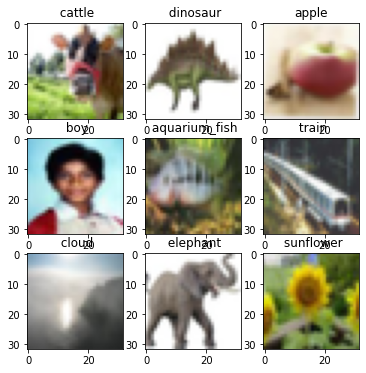

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds


# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Συναρτήσεις εκπαίδευσης

Θα χρησιμοποιήσουμε την ιδιότητα data prefetch του tf2:

In [ ]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1, augmented = False, callbacks = None):
  if augmented == False:
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks = callbacks)
  else:
    history = model.fit(augmented, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks = callbacks)
  return(history)

## Γραφικές παραστάσεις εκπαίδευσης και απόδοση στο σύνολο ελέγχου

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

## Μοντέλα δικτύων

### Ένα μικρό συνελικτικό δίκτυο "from scratch"

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 50, 30, 5)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

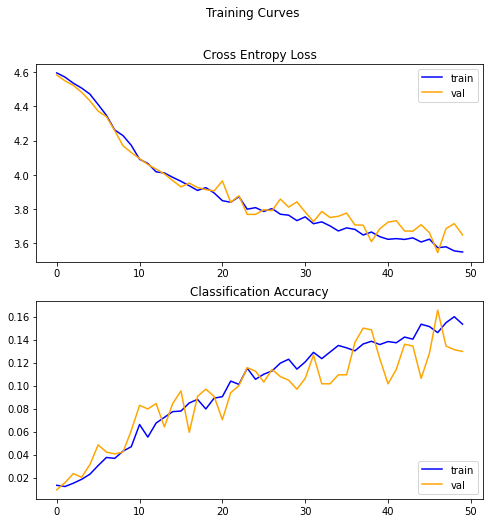


Test set evaluation metrics
30/30 [==============================] - 0s 5ms/step - loss: 3.6027 - accuracy: 0.1477
loss: 3.60
accuracy: 0.15


In [ ]:
model_report(SIMPLE_MODEL, SIMPLE_MODEL_history, 30)

### Μεταφορά μάθησης: VGG16

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary):
  vgg_model=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  VGG16_MODEL=vgg_model.layers[0](vgg_model)

  # unfreeze conv layers
  VGG16_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
VGG16_MODEL = init_VGG16_model(True)
VGG16_MODEL_history = train_model(VGG16_MODEL, 25, 40, 10)


58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
40/40 [==============================] - 6s 71ms/step - loss: 4.8142 - accuracy: 0.0175 - val_loss: 4.4632 - val_accuracy: 0.0375
Epoch 2/25
40/40 [==================

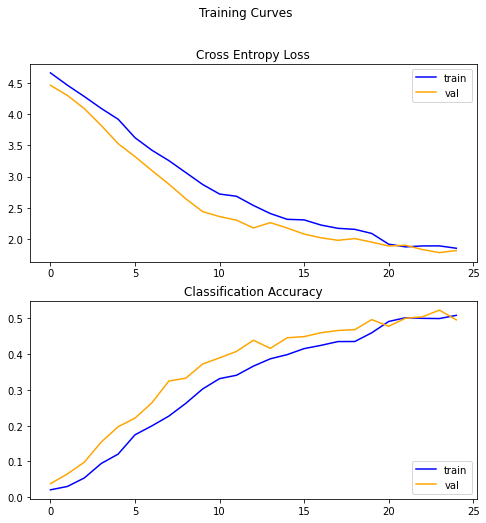


Test set evaluation metrics
30/30 [==============================] - 1s 15ms/step - loss: 1.7305 - accuracy: 0.5219
loss: 1.73
accuracy: 0.52


In [ ]:
model_report(VGG16_MODEL, VGG16_MODEL_history, 30)

# Βελτίωση της επίδοσης με πειράματα

Καλείστε να βελτιώσετε τα αποτελέσματα ταξινόμησης στο CIFAR-100 και να βγάλατε συμπεράσματα, σύμφωνα με όσα ζητούνται σε σχέση με την αναφορά παράδοσης. 

## Δοκιμές διαφορετικών μοντέλων

Μπορείτε είτε να δοκιμάσετε μοντέλα "from scratch", όπου ορίζετε την αρχιτεκτονική του δικτύου όπως θέλετε, είτε να χρησιμοποιήσετε μεταφορά μάθησης.



### Μοντέλα "from scratch"

Μπορείτε να τροποποιήσετε/αλλάξετε το αρχικό μικρό συνελικτικό δίκτυο του παραδείγματος. Μπορείτε να συμβουλευτείτε 
- τη [βιβλιογραφία απο το leaderboard του CIFAR-100](https://benchmarks.ai/cifar-100) για αρχιτεκτονικές και παραμέτρους των δικτύων
- ή/και να πάρετε ιδέες [από σχετική αναζήτηση στο Google Scholar](https://scholar.google.gr/scholar?hl=en&as_sdt=0%2C5&q=cifar+100+cnn&oq=cifa)

#### 1η Προσπάθεια:

https://www.researchgate.net/figure/The-CNN-architecture-over-CIFAR-100-dataset_tbl2_339600824

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_better_model1(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(128, (5, 5), activation='relu', input_shape=(32,32,3)))
  model.add(layers.AveragePooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
better_model1 = init_better_model1(summary = True)
better_model_history1 = train_model(better_model1, 50, 30, 5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 128)       9728      
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
Total params: 6,458,212
Trainable params: 6,458,212
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
30/30 [==============================] - 1s 27ms/step - loss: 3.8935 - accuracy: 0.0992 - val_loss:

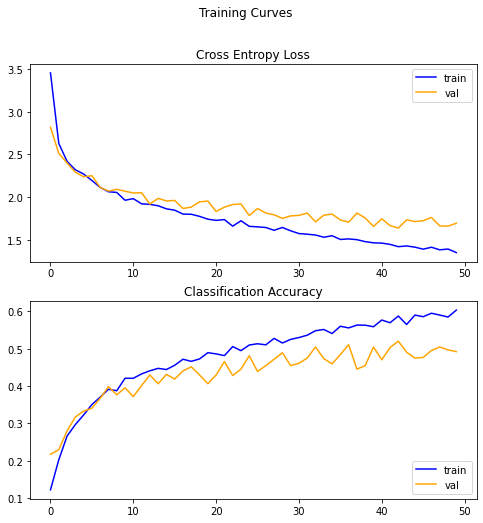


Test set evaluation metrics
30/30 [==============================] - 0s 8ms/step - loss: 1.7043 - accuracy: 0.4971
loss: 1.70
accuracy: 0.50


In [ ]:
model_report(better_model1, better_model_history1, 30)

#### 2η Προσπάθεια:

https://openaccess.thecvf.com/content_ICCV_2017/papers/Zoumpourlis_Non-Linear_Convolution_Filters_ICCV_2017_paper.pdf


In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_better_model2(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32 * 32, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.Conv2D(32 * 32, (3, 3), activation='relu'))
  model.add(layers.Conv2D(16 * 16, (3, 3), activation='relu'))
  model.add(layers.Conv2D(8 * 8, (3, 3), activation='relu'))
  model.add(layers.LayerNormalization())
  model.add(layers.ReLU())
  model.add(layers.AveragePooling2D((8, 8)))
  model.add(layers.Flatten())
  model.add(layers.Dense(100, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
better_model2 = init_better_model2(summary = True)
better_model_history2 = train_model(better_model2, 50, 30, 5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 1024)      28672     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 1024)      9438208   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 256)       2359552   
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        147520    
_________________________________________________________________
layer_normalization_1 (Layer (None, 24, 24, 64)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 24, 24, 64)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 3, 3, 64)         

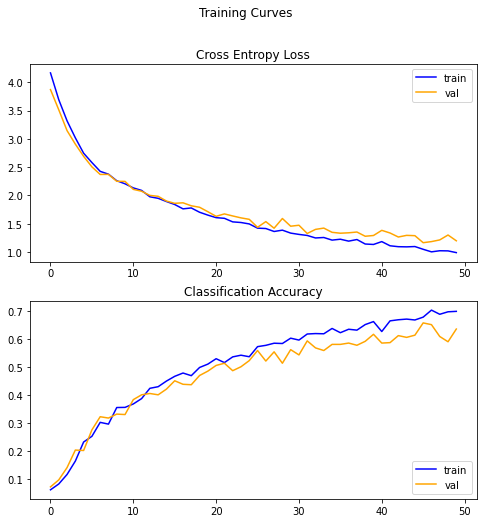


Test set evaluation metrics
30/30 [==============================] - 10s 339ms/step - loss: 1.2278 - accuracy: 0.6227
loss: 1.23
accuracy: 0.62


In [ ]:
model_report(better_model2, better_model_history2, 30)

#### 3η Προσπάθεια: 

Stack architecture with increasing Convolution layers, ELU activation functions

Υποφέρει από overfit.

In [76]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_better_model3(summary):
  model = models.Sequential()

  #Stack
  model.add(layers.Conv2D(128, (3, 3), padding = 'same', input_shape=(32,32,3)))
  model.add(layers.ELU())
  model.add(layers.Conv2D(128, (3, 3), padding = 'same'))
  model.add(layers.ELU())
  model.add(layers.MaxPooling2D((2, 2)))

  #Stack
  model.add(layers.Conv2D(256, (3, 3), padding = 'same'))
  model.add(layers.ELU())
  model.add(layers.Conv2D(256, (3, 3), padding = 'same'))
  model.add(layers.ELU())
  model.add(layers.MaxPooling2D((2, 2)))

  #Stack
  model.add(layers.Conv2D(512, (3, 3), padding = 'same'))
  model.add(layers.ELU())
  model.add(layers.Conv2D(512, (3, 3), padding = 'same'))
  model.add(layers.ELU())
  model.add(layers.MaxPooling2D((4, 4)))

  model.add(layers.Flatten())
  model.add(layers.Dense(1024))
  model.add(layers.ELU())
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
better_model3 = init_better_model3(summary = True)
better_model_history3 = train_model(better_model3, 50, 30, 5)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
elu_52 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
elu_53 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
elu_54 (ELU)                 (None, 16, 16, 256)     

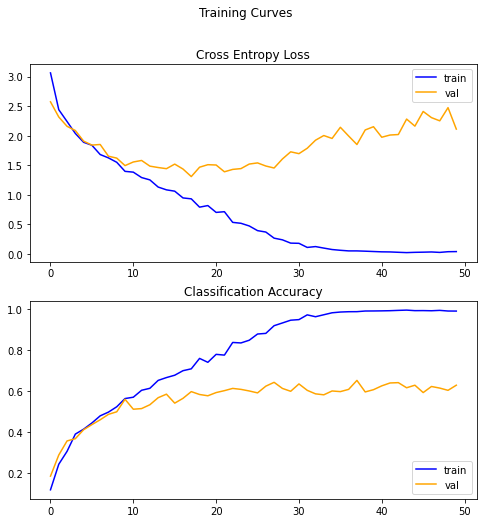


Test set evaluation metrics
30/30 [==============================] - 2s 48ms/step - loss: 2.3252 - accuracy: 0.6240
loss: 2.33
accuracy: 0.62


In [ ]:
model_report(better_model3, better_model_history3, 30)

#### 4η Προσπάθεια:

Stack architecture with increasing Convolution layers, ELU activation functions, Batch Normalisation and Dropout

Διορθώνει το overfit εισάγωντας μεγάλες πιθανότητες dropout σε όλα τα layers

In [23]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_better_model4(summary):
  model = models.Sequential()

  #Stack
  model.add(layers.Conv2D(128, (3, 3), padding = 'same', input_shape=(32,32,3)))
  model.add(layers.BatchNormalization())
  model.add(layers.ELU())
  model.add(layers.Conv2D(128, (3, 3), padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ELU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(.3))

  #Stack
  model.add(layers.Conv2D(256, (3, 3), padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ELU())
  model.add(layers.Conv2D(256, (3, 3), padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ELU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(.3))

  #Stack
  model.add(layers.Conv2D(512, (3, 3), padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ELU())
  model.add(layers.Conv2D(512, (3, 3), padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ELU())
  model.add(layers.MaxPooling2D((4, 4)))
  model.add(layers.Dropout(.4))

  model.add(layers.Flatten())
  model.add(layers.Dense(1024))
  model.add(layers.BatchNormalization())
  model.add(layers.ELU())
  model.add(layers.Dropout(.5))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
better_model4 = init_better_model4(summary = True)
better_model_history4 = train_model(better_model4, 100, 30, 5)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
elu_31 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
elu_32 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 128)     

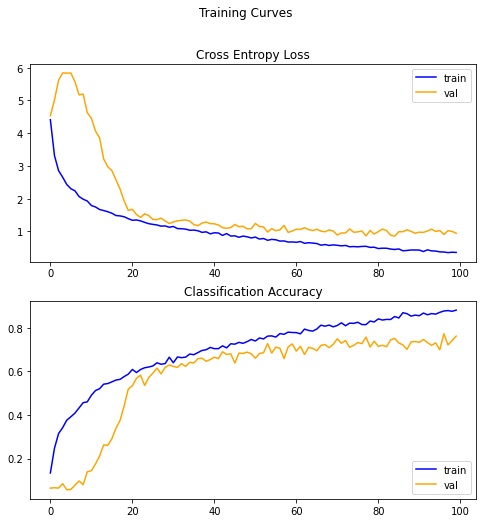


Test set evaluation metrics
30/30 [==============================] - 2s 50ms/step - loss: 0.9194 - accuracy: 0.7516
loss: 0.92
accuracy: 0.75


In [ ]:
model_report(better_model4, better_model_history4, 30)

### Μεταφορά μάθησης

Εναλλακτικά, μπορείτε να χρησιμοποιήσετ τη [μεταφορά μάθησης του tf2](https://www.tensorflow.org/tutorials/images/transfer_learning). Σε αντίθεση με τα μοντέλα "from scratch" η μεταφορά μάθησης μας επιστρέφει έτοιμα μοντέλα με προκαθορισμένη αρχιτεκτονική στην οποία μπορούμε γενικά μόνο να προσθέσουμε επίπεδα, τα οποία συνήθως περιορίζοντα σε πλήρως διασυνδεδεμένα επίπεδα που εξειδικεύονται στο συγκεκριμένο task ταξινόμησης που έχουμε να επιτελέσουμε. 

#### Εκπαίδευση βαρών

Ταυτόχρονα με την αρχιτεκτονική, στη μεταφορά μάθησης εισάγουμε και τη γνώση που έχει αποκτήσει το μοντέλο, δηλαδή τις τιμές των βαρών του όπως έχουν προκύψει μετά από εκπαίδευση συνήθως στο (τεράστιο) ImageNet. Οταν εισάγουμε ένα μοντέλο με μεταφορά μάθησης έχουμε τρεις επιλογές για την εκπαίδευση:
- να παγώσουμε τη συνελικτική βάση και να εκπαιδεύσουμε την κεφαλή ταξινόμησης (classification head). Αυτό αντιστοιχεί στο να χρησιμοποιήσουμε τη συνελικτική βάση για εξαγωγή χαρακτηριστικών (feature extraction), σημαία trainable = False.
- να συνεχίσουμε να εκπαιδεύουμε όλα τα επίπεδα του δικτύου, σημαία trainable = True.
- να εκπαιδευτεί μόνο ένα ποσοστό των επιπέδων, εβρισκόμενο προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.



#### Διαθέσιμα μοντέλα για μεταφορά μάθησης στο tf2

1. tf.keras.applications. Ο πιο απλός τρόπος για να κάνουμε μεταφορά μάθησης στο tf2 είναι μέσω του [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications) που παρέχει προεκπαιδευμένα μοντέλα από το Keras και συγκεκριμένα τα δίκτυα: DenseNet, Inception-ResNet V2, Inception V3, MobileNet v1, MobileNet v2, NASNet-A, ResNet, ResNet v2, VGG16, VGG19 και Xception V1. Η εισαγωγή των μοντέλων γίνεται παρόμοια με αυτή που δείξαμε παραπάνω για το VGG16.

2. TensorFlow Hub. Μπορείτε επίσης να χρησιμοποιήσετε μοντέλα τα οποία είναι διαθέσιμα στο αποθετήριο [TensoFlow Hub](https://tfhub.dev/s?fine-tunable=yes&module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent&tf-version=tf2) το οποίο περιλαμβάνει πάνω από 100 προεκπαιδευμένα μοντέλα.

3. Αποθηκευμένα μοντέλα απο τρίτες πηγές. Μπορείτε επίσης να κάνετε μεταφορά μάθησης από τρίτες πηγές, είτε του συνόλου του νευρωνικού, αρχιτεκτονικής και βαρών, είτε μόνο της αρχιτεκτονικής ή των βαρών. Το μοντέλο θα πρέπει να έχει αποθηκευθεί σε ένα από τα δύο φορμάτ, Keras HDF5 format (.h5 ή .keras) ή στο SavedModel format που αναφέραμε στην εισαγωγή. Τα βάρη μπορούν να εισαχθούν και μόνα τους ως Checkpoints. Για περισσότερα, διαβάστε σχετικά τα λήμματα ["Save and load models"](https://www.tensorflow.org/tutorials/keras/save_and_load), ["Save and serialize"](https://www.tensorflow.org/guide/keras/save_and_serialize), ["Using the SavedModel format"](https://www.tensorflow.org/guide/saved_model) και δείτε για παράδειγμα πως μπορούμε να κάνουμε μεταφορά μάθησης από τα state-of-the-art EfficientNets ([1](https://www.dlology.com/blog/transfer-learning-with-efficientnet/), [2](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnethttps://)).

Σημειώστε ότι πολλά μοντέλα απαιτούν μεγαλύτερες διαστάσεις στην είσοδο από αυτές του CIFAR-100 και κατά συνέπεια τα δεδομένα πρέπει να [μετασχηματιστούν](https://www.tensorflow.org/api_docs/python/tf/image/resize). Προσέξτε ωστόσο τις απαιτήσεις σε μνήμη όταν αυτοί οι μετασχηματισμοί γίνονται απευθείας σε μεταβλητές (βλ. πιο κάτω "Διαχείριση μνήμης"). 


#### 1η Προσπάθεια - VGG19:


In [14]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG19_model(summary):
  vgg_model=tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  VGG19_MODEL=vgg_model.layers[0](vgg_model)

  # unfreeze conv layers
  VGG19_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.6)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG19_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [175]:
VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 4s 79ms/step - loss: 4.3653 - accuracy: 0.0638 - val_loss: 2.1848 - val_accuracy: 0.4227
Epoch 2/40
40/40 [==============================] - 3s 73ms/step - loss: 2.4222 - accuracy: 0.3558 

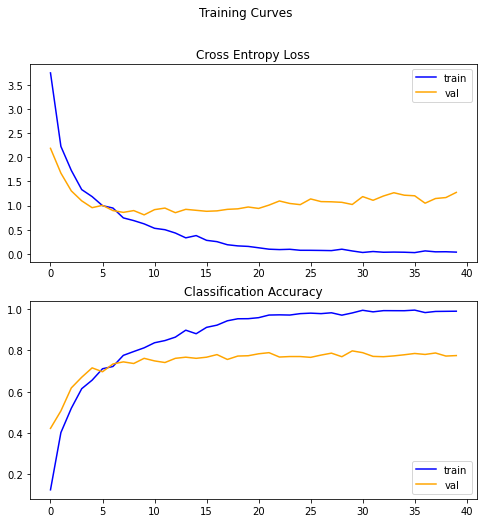


Test set evaluation metrics
50/50 [==============================] - 1s 20ms/step - loss: 1.1909 - accuracy: 0.7791
loss: 1.19
accuracy: 0.78


In [176]:
model_report(VGG19_MODEL, VGG19_MODEL_history, 50)

#### 2η Προσπάθεια - ResNet50:

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_ResNet50_model(summary):
  ResNet50_model=tf.keras.applications.ResNet50(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  ResNet50_MODEL=ResNet50_model.layers[0](ResNet50_model)

  # unfreeze conv layers
  ResNet50_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.8)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([ResNet50_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
ResNet50_MODEL = init_ResNet50_model(True)
ResNet50_MODEL_history = train_model(ResNet50_MODEL, 60, 40, 10)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 2048)        0         
_________________________________________________________________
global_average_pooling2d_9 ( (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               204900    
Total params: 23,792,612
Trainable params: 23,739,492
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/60
40/40 [==============================] - 8s 93ms/step - loss: 10.8294 - accuracy: 0.0130 - val_loss: 38.1152 - val_accuracy: 0.0430
Epoch 2/60
40/40 [==============================] - 3s 71ms/step - loss: 6.4734 - accuracy:

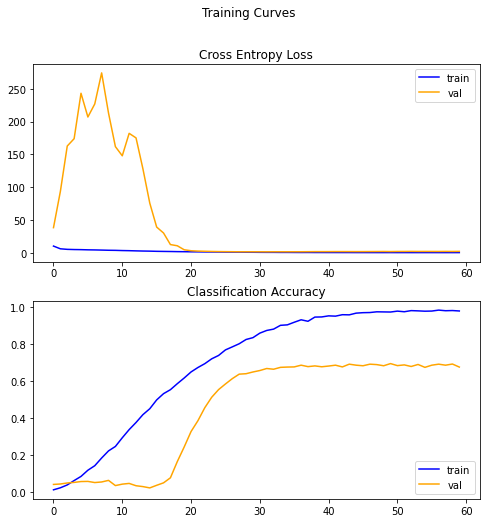


Test set evaluation metrics
50/50 [==============================] - 1s 17ms/step - loss: 1.8473 - accuracy: 0.6891
loss: 1.85
accuracy: 0.69


In [ ]:
model_report(ResNet50_MODEL, ResNet50_MODEL_history, 50)

### Επαύξηση δεδομένων

Μια τεχνική που μπορεί να σας δώσει καλά αποτελέσματα είναι η επάυξηση δεδομένων (data augmentation). Η επαύξηση δεδομένων επιτρέπει να δημιουργήσουμε μεγαλύτερη ποικιλία στα δεδομένα εφαρμόζοντας τυχαίους αλλά ρεαλιστικούς μετασχηματισμούς στις εικόνες, όπως πχ η περιστροφη.

Μπορούμε να κάνουμε data augmetation με δύο τρόπους: με επίπεδα προεπεξεργασίας του Keras, ή με χρήση του tf.image. Δείτε [εδώ](https://www.tensorflow.org/tutorials/images/data_augmentation) σχετικά από το documentation του TensorFlow και [εδώ](https://stepup.ai/train_data_augmentation_keras/) ένα πρακτικό παράδειγμα στο CIFAR-10.

#### Μέθοδος Επάυξησης

Για να επαυξήσουμε τα δεδομένα επιτρέπουμε flips και μικρές στροφές  

In [36]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
            num_parallel_calls=AUTOTUNE)

# Use buffered prefecting on all datasets
ds = ds.prefetch(buffer_size=AUTOTUNE)

#### Επαύξηση στο Transfer Learning

In [64]:
VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10, ds)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 4s 80ms/step - loss: 4.4028 - accuracy: 0.0514 - val_loss: 2.9698 - val_accuracy: 0.2273
Epoch 2/40
40/40 [==============================] - 3s 73ms/step - loss: 3.2947 - accuracy: 0.1532 

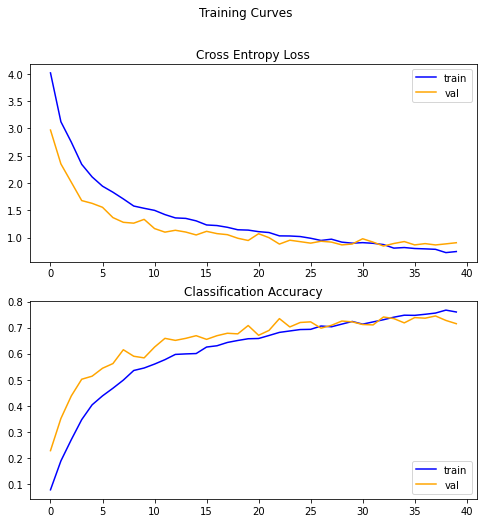


Test set evaluation metrics
50/50 [==============================] - 1s 21ms/step - loss: 0.8865 - accuracy: 0.7248
loss: 0.89
accuracy: 0.72


In [65]:
model_report(VGG19_MODEL, VGG19_MODEL_history, 50)

#### Επαύξηση στο From Scratch

In [82]:
better_model4 = init_better_model4(summary = True)
better_model_history4 = train_model(better_model4, 400, 30, 5, ds)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
elu_35 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
elu_36 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 128)     

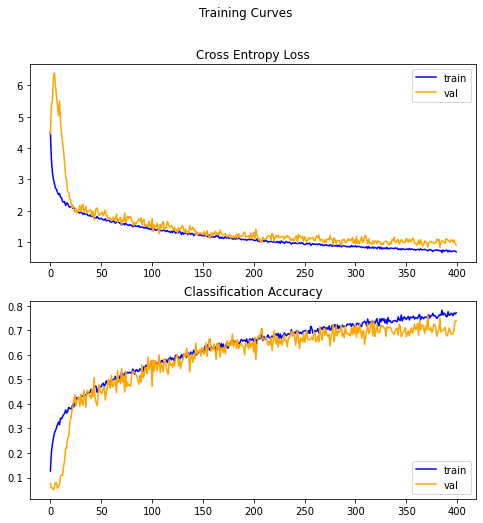


Test set evaluation metrics
30/30 [==============================] - 1s 25ms/step - loss: 0.9311 - accuracy: 0.7255
loss: 0.93
accuracy: 0.73


In [83]:
model_report(better_model4, better_model_history4, 30)

## Παρατηρήσεις ως προς τη βελτιστοποίηση

### Διαχείριση μνήμης (TFRecord)

Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι καθόλου αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούνα να αναγνωστούν γραμμικά. Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε τα σχετικά λήμματα [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).



#### Κώδικας υλοποίησης TFRecords μέσα από τα raw δεδομένα

In [124]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    # If the value is an eager tensor BytesList won't unpack a string from an EagerTensor.
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() 
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_array(array):
    array = tf.io.serialize_tensor(array)
    return array

In [125]:
train_path_multiple = list()
for i in range(0,int(len(x_train)/250)):
    train_path_multiple.append('train_{}.tfrecords'.format(i))
    with tf.io.TFRecordWriter(train_path_multiple[i]) as writer:
        for array, label in zip(x_train[250*i:250*(i+1)], y_train[250*i:250*(i+1)]):
          serialized_array = serialize_array(array)
          feature = {'b_feature': _bytes_feature(serialized_array), 'label': _int64_feature(label)} # create dictionary to store data for each train instance
          example_message = tf.train.Example(features=tf.train.Features(feature=feature))
          writer.write(example_message.SerializeToString())

In [126]:
val_path_multiple = list()
for i in range(0,int(len(x_val)/250)):
    val_path_multiple.append('val_{}.tfrecords'.format(i))
    with tf.io.TFRecordWriter(val_path_multiple[i]) as writer:
        for array, label in zip(x_val[250*i:250*(i+1)], y_val[250*i:250*(i+1)]):
          serialized_array = serialize_array(array)
          feature = {'b_feature': _bytes_feature(serialized_array), 
                  'label': _int64_feature(label)} # create dictionary to store data for each val instance
          example_message = tf.train.Example(features=tf.train.Features(feature=feature))
          writer.write(example_message.SerializeToString())

In [127]:
test_path_multiple = list()
for i in range(0,int(len(x_test)/250)):
    test_path_multiple.append('test_{}.tfrecords'.format(i))
    with tf.io.TFRecordWriter(test_path_multiple[i]) as writer:
        for array, label in zip(x_test[250*i:250*(i+1)], y_test[250*i:250*(i+1)]):
          serialized_array = serialize_array(array)
          feature = {'b_feature': _bytes_feature(serialized_array), 
                  'label': _int64_feature(label)} # create dictionary to store data for each val instance
          example_message = tf.train.Example(features=tf.train.Features(feature=feature))
          writer.write(example_message.SerializeToString())

In [128]:
def _parse_tfr_element(element):
    parse_dic = { 'b_feature': tf.io.FixedLenFeature([], tf.string), # Note that it is tf.string, not tf.float32
                  'label': tf.io.FixedLenFeature([], tf.int64)}
    example_message = tf.io.parse_single_example(element, parse_dic)

    b_feature = example_message['b_feature'] # get byte string
    label = tf.cast(example_message['label'], tf.int64)
    feature = tf.io.parse_tensor(b_feature, out_type=tf.float64) # restore Multi-Dimensional array from byte string

    feature.set_shape((32, 32, 3))  # shapes are not stored, so they must be set manually
    label.set_shape(())

    return feature, label

### Υπερεκπαίδευση

Μπορείτε να πειραματιστείτε ως προς τον έλεγχο της υπερεκπαίδευσης (overfitting) με διάφορους τρόπους. Μεταξύ αυτών μπορούμε να αναφέρουμε τους εξής:
- Πρόωρος τερματισμός (early stopping). Μια μέθοδος που τερματίζει την εκπαίδευση αν δεν υπάρχει βελτίωση ως προς τη μετρική απόδοσης που παρακολουθούμε. [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)
- Dropout. Μια άλλη τεχνική για τη μείωση της υπερεκπαίδευσης είναι το Dropout. Είναι ένα είδος ομαλοποίησης (regularization) που επιβάλλει στα βάρη του δικτύου να παίρνουν μόνο μικρές τιμές. Εάν εφαρμόσουε dropout σε ένα επίπεδο του δικτύου, τότε ένα ποσοστό των βαρών του γίνεται τυχαία μηδενικό κατά την εκπαίδευση. [Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout)
- Επαύξηση δεδομένων. Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. [Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)

Βλέπε επίσης [Image classification](https://www.tensorflow.org/tutorials/images/classification).

#### Early Stopping

Θα χρησιμοποιήσουμε early stopping για το μοντέλο transfer learning VGG19.
Παρατηρούμε πως σταματά νωρίτερα από τις maximum εποχές.


In [178]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10, callbacks=callback)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_7 ( (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 4s 79ms/step - loss: 4.1955 - accuracy: 0.0908 - val_loss: 2.0247 - val_accuracy: 0.4203
Epoch 2/40
40/40 [==============================] - 3s 74ms/step - loss: 2.3797 - accuracy: 0.3538

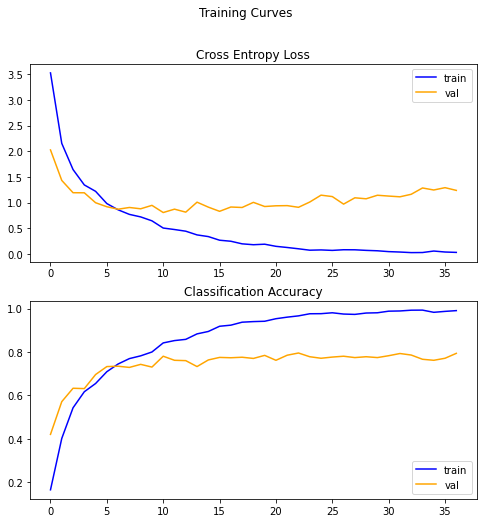


Test set evaluation metrics
30/30 [==============================] - 1s 19ms/step - loss: 1.3636 - accuracy: 0.7703
loss: 1.36
accuracy: 0.77


In [179]:
model_report(VGG19_MODEL, VGG19_MODEL_history, 30)

#### Dropout

Εφαρμόσαμε Dropout ως μιά μέθοδο βελτίωσης της απόδοσης του μοντέλου 3 και λάβαμε το σαφώς καλύτερο μοντέλο 4 το οποίο δεν υποφέρει από ολικό overfit (σχεδόν 100% accuracy στο train με 60% πραγματικό accuracy)

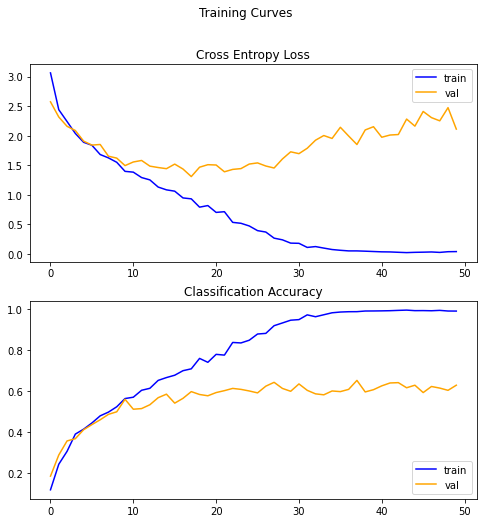


Test set evaluation metrics
30/30 [==============================] - 2s 48ms/step - loss: 2.3252 - accuracy: 0.6240
loss: 2.33
accuracy: 0.62


In [ ]:
model_report(better_model3, better_model_history3, 30)

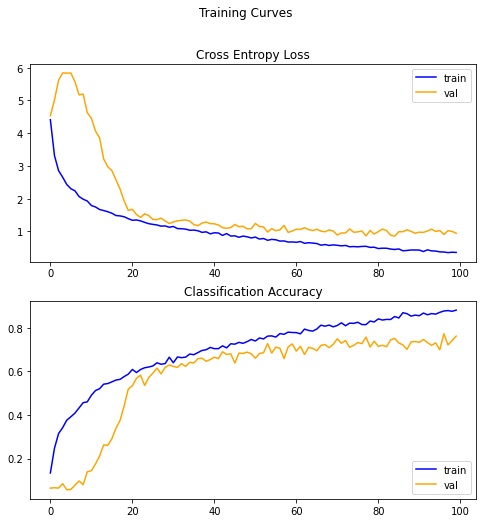


Test set evaluation metrics
30/30 [==============================] - 2s 50ms/step - loss: 0.9194 - accuracy: 0.7516
loss: 0.92
accuracy: 0.75


In [ ]:
model_report(better_model4, better_model_history4, 30)

#### Data Augmentation

Η επαύξηση δεδομένων είναι μια εξαιρετική μέθοδος για να μειώσουμε το overfitting και να κάνουμε τα μοντέλα μας να γενικεύουν καλύτερα. Τα μειονεκτήματα της είναι:
1. Χρειάζεται παραπάνω εποχές για να συγκλίνει.
2. Περισσότερα δεδομένα πολλές φορές έχουν τόσο μεγάλες απαιτήσεις στην μνήμη που πρέπει να διαχειριστούμε τα δεδομένα σε αρχεία.

##### Εκπαίδευση Με Data Augmentation

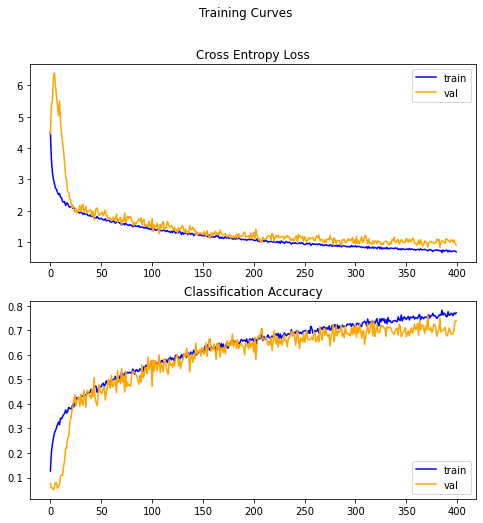


Test set evaluation metrics
30/30 [==============================] - 1s 25ms/step - loss: 0.9311 - accuracy: 0.7255
loss: 0.93
accuracy: 0.73


In [ ]:
model_report(better_model4, better_model_history4, 30)

##### Εκπαίδευση Χωρίς Data Augmentation

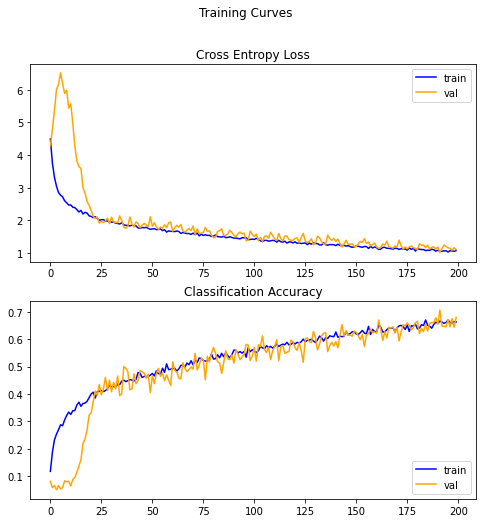


Test set evaluation metrics
30/30 [==============================] - 1s 26ms/step - loss: 1.1336 - accuracy: 0.6544
loss: 1.13
accuracy: 0.65


In [ ]:
model_report(better_model4, better_model_history4, 30)

### Χρόνος εκπαίδευσης

Το TensorFlow 2 προσφέρει νέους ή βελτιώνει διάφορους μηχανισμούς βελτιστοποίησης της εκπαίδευσης. Μεταξύ αυτών έχουμε τους εξής:
- Data prefetching (το χρησιμοποιήσαμε παραπάνω)
- Data reading parallelization 
- Map transformation parallelization
- Caching
- Reducing memory footprint

Συμβουλευτείτε για τα παραπάνω το [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

#### Χωρίς Data prefetching

In [103]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(file_path, num_epochs = 30, BATCH_SIZE = 128):
    d = tf.data.TFRecordDataset(file_path)
    d = d.map(_parse_tfr_element)  # map deconding function that will allow data to be loaded sequentially
    d = d.shuffle(buffer_size=data_size)
    d = d.repeat()
    d = d.batch(BATCH_SIZE)
    # d = d.prefetch(buffer_size=AUTOTUNE)
    return d

train_ds =_input_fn(train_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(val_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(test_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
    return(history)

start_time = time.time()

VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10)

end_time = time.time()

print("Running Time =", end_time - start_time)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_13  (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 6s 99ms/step - loss: 4.4705 - accuracy: 0.0475 - val_loss: 2.7827 - val_accuracy: 0.3125
Epoch 2/40
40/40 [==============================] - 4s 94ms/step - loss: 3.0496 - accuracy: 0.2370

#### Με Prefetching

In [104]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(file_path, num_epochs = 30, BATCH_SIZE = 128):
    d = tf.data.TFRecordDataset(file_path)
    d = d.map(_parse_tfr_element)  # map deconding function that will allow data to be loaded sequentially
    d = d.shuffle(buffer_size=data_size)
    d = d.repeat()
    d = d.batch(BATCH_SIZE)
    d = d.prefetch(buffer_size=AUTOTUNE)
    return d

train_ds =_input_fn(train_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(val_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(test_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
    return(history)

start_time = time.time()

VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10)

end_time = time.time()

print("Running Time =", end_time - start_time)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_26 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_14  (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 5s 91ms/step - loss: 4.3970 - accuracy: 0.0608 - val_loss: 2.2925 - val_accuracy: 0.3820
Epoch 2/40
40/40 [==============================] - 3s 85ms/step - loss: 2.5687 - accuracy: 0.3064

#### Με data Parallelization

In [99]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance
interleave = tf.data.Dataset.interleave

def _input_fn(file_path, num_epochs = 30, BATCH_SIZE = 128):
    files = tf.data.Dataset.list_files(file_path)
    d = files.interleave(lambda x: tf.data.TFRecordDataset(x).prefetch(AUTOTUNE),
                            cycle_length=8, block_length=8, num_parallel_calls=AUTOTUNE)
    d = d.map(_parse_tfr_element)  # map deconding function that will allow data to be loaded sequentially
    d = d.shuffle(buffer_size=2*BATCH_SIZE)
    d = d.repeat()
    d = d.batch(BATCH_SIZE)
    return d

train_ds =_input_fn(train_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(val_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(test_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
    return(history)

start_time = time.time()

VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10)

end_time = time.time()

print("Running Time =", end_time - start_time)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_9 ( (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 4s 90ms/step - loss: 4.1715 - accuracy: 0.0725 - val_loss: 2.1919 - val_accuracy: 0.4062
Epoch 2/40
40/40 [==============================] - 3s 82ms/step - loss: 2.4142 - accuracy: 0.3465

#### Με map transformation parallelization


In [100]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance
interleave = tf.data.Dataset.interleave

def _input_fn(file_path, num_epochs = 30, BATCH_SIZE = 128):
    d = tf.data.TFRecordDataset(file_path)
    d = d.map(_parse_tfr_element, num_parallel_calls = AUTOTUNE)  # map deconding function that will allow data to be loaded sequentially
    d = d.shuffle(buffer_size=data_size)
    d = d.repeat()
    d = d.batch(BATCH_SIZE)
    return d

train_ds =_input_fn(train_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(val_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(test_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
    return(history)

start_time = time.time()

VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10)

end_time = time.time()

print("Running Time =", end_time - start_time)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_10  (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 5s 89ms/step - loss: 4.3265 - accuracy: 0.0718 - val_loss: 2.2886 - val_accuracy: 0.3352
Epoch 2/40
40/40 [==============================] - 3s 84ms/step - loss: 2.5716 - accuracy: 0.2967

#### Με caching

In [102]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(file_path, num_epochs = 30, BATCH_SIZE = 128):
    d = tf.data.TFRecordDataset(file_path)
    d = d.map(_parse_tfr_element)  # map deconding function that will allow data to be loaded sequentially
    d = d.cache()
    d = d.shuffle(buffer_size=data_size)
    d = d.repeat()
    d = d.batch(BATCH_SIZE)
    return d

train_ds =_input_fn(train_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(val_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(test_path_multiple, num_epochs = 50, BATCH_SIZE=BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
    return(history)

start_time = time.time()

VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 40, 40, 10)

end_time = time.time()

print("Running Time =", end_time - start_time)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_12  (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 5s 82ms/step - loss: 4.5637 - accuracy: 0.0607 - val_loss: 2.1883 - val_accuracy: 0.4047
Epoch 2/40
40/40 [==============================] - 3s 72ms/step - loss: 2.5504 - accuracy: 0.3248

#### Σχόλια

*   Χωρίς Data prefetching  154s

*   Με Data prefetching 140s

*   Με Data reading parallelization 134s

*   Με Map transformation parallelization 140s

*   Με Caching 119s

Παρατηρούμε την επίδοση των τεχνικών Caching και Data reading parallelization πως είναι οι καλύτερες μέθοδοι εν προκειμένω.

# Συμπληρωματικά ερωτήματα - Κεντρικά Αποτελέσματα για 80 classes.

### Μεταφορά μάθησης vs εκπαίδευση εκ του μηδενός (“from scratch”)

Το μοντέλο που υλοποιήσαμε είναι sophisticated enough ώστε να επιτυγχάνει συγκρίσιμα καλές επιδόσεις με κάποιο καλό μοντέλο Transfer Learning. Σημαντικό βέβαια είναι πως το from scratch μοντέλο χρειάζεται πολλές παραπάνω εποχές για να εκπαιδευτεί ικανοποιητικά. 

In [153]:
better_model4 = init_better_model4(summary = True)
better_model_history4 = train_model(better_model4, 200, 30, 5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
elu_14 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
elu_15 (ELU)                 (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)      

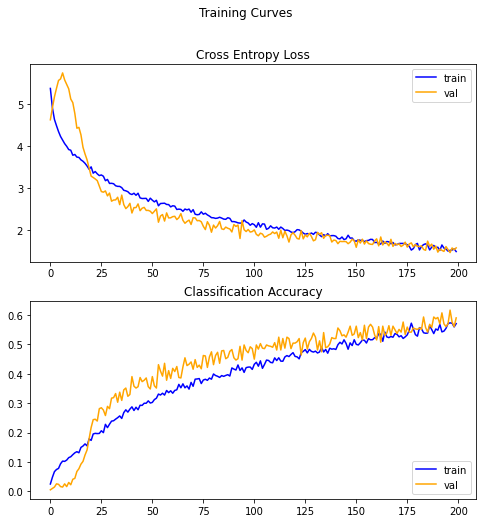


Test set evaluation metrics
30/30 [==============================] - 1s 25ms/step - loss: 1.5556 - accuracy: 0.5672
loss: 1.56
accuracy: 0.57


In [154]:
model_report(better_model4, better_model_history4, 30)

In [19]:
VGG19_MODEL = init_VGG19_model(True)
VGG19_MODEL_history = train_model(VGG19_MODEL, 80, 40, 10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
40/40 [==============================] - 4s 79ms/step - loss: 4.9625 - accuracy: 0.0100 - val_loss: 4.5909 - val_accuracy: 0.0227
Epoch 2/80
40/40 [==============================] - 3s 72ms/step - loss: 4.5910 - accuracy: 0.0139 

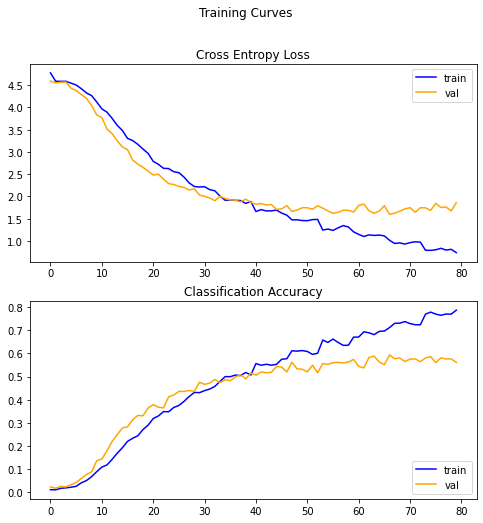


Test set evaluation metrics
50/50 [==============================] - 1s 20ms/step - loss: 1.7830 - accuracy: 0.5809
loss: 1.78
accuracy: 0.58


In [20]:
model_report(VGG19_MODEL, VGG19_MODEL_history, 50)

### Επίδραση της επαύξησης δεδομένων (data augmentation)

Η επαύξηση δεδομένων είναι μια εξαιρετική μέθοδος για να μειώσουμε το overfitting και να κάνουμε τα μοντέλα μας να γενικεύουν καλύτερα. Τα μειονεκτήματα της είναι:
1. Χρειάζεται παραπάνω εποχές για να συγκλίνει.
2. Περισσότερα δεδομένα πολλές φορές έχουν τόσο μεγάλες απαιτήσεις στην μνήμη που πρέπει να διαχειριστούμε τα δεδομένα σε αρχεία.



In [38]:
VGG16_MODEL = init_VGG16_model(True)
VGG16_MODEL_history = train_model(VGG16_MODEL, 200, 40, 10, ds)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 4s 72ms/step - loss: 4.8167 - accuracy: 0.0126 - val_loss: 4.4736 - val_accuracy: 0.0328
Epoch 2/200
40/40 [==============================] - 2s 63ms/step - loss: 4.5167 - accuracy: 0.026

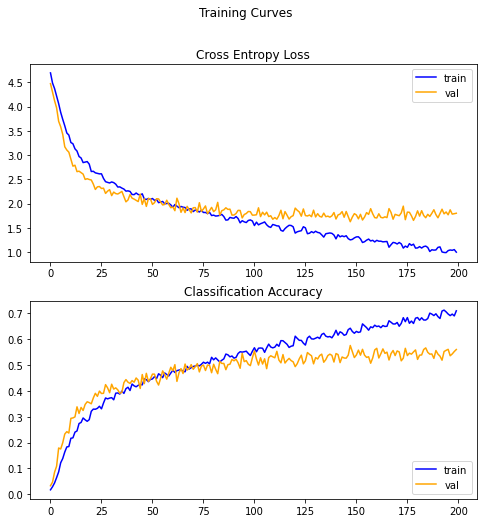


Test set evaluation metrics
30/30 [==============================] - 1s 19ms/step - loss: 1.9057 - accuracy: 0.5404
loss: 1.91
accuracy: 0.54


In [39]:
model_report(VGG16_MODEL, VGG16_MODEL_history, 30)

### Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου

Είναι εντελώς σαφές πως το πρόβλημα ταξινόμησης γίνεται πολύ πιο δύσκολο όταν έχεις παραπάνω κλάσεις. Αυτό το παρατηρούμε και από τα αποτελέσματα μας.


*   Στις 20 κλάσεις έχουμε accuracy της τάξης του 80% στο μοντέλο Transfer learning και της τάξης του 75% στο from scratch.

*   Από την άλλη στις 80 κλάσεις έχουμε accuracy της τάξης του 60% και στο μοντέλο Transfer learning και στο μοντέλο from scratch.

Είναι εξίσου σαφές πως το πλήθος των δεδομένων επηρεάζει σημαντικά την απόδοση του μοντέλου. Συγκεκριμένα μικρό μέγεθος του dataset πολλές φορές καταλήγει το μοντέλο μας σε overfitting ενώ άλλες φορές τα δεδομένα μας δεν αρκούν ώστε να διαχωρίζουμε καλά τις κλάσεις μεταξύ τους. Αυτό όπως είδαμε και παραπάνω αντιμετωπίζεται με την μέθοδο του data augmentation.

### Επίδραση του ρυθμού μάθησης (learning rate) και Optimizer

Σε όλα τα μοντέλα χρησιμοποιήσαμε τον Adam optimizer διοτί συνήθως δίνει πιο ομαλές μεταβάσεις από τον SGD. Το learning rate λόγω και της φύσης του προβλήματος αλλά και του μεγάλου όγκου δεδομένων επιλέχθηκε πολύ μικρό. Ανεξαρτήτως αυτού βέβαια ο Adam προσαρμόζει το learning rate ανάλογα με κατάσταση που βρισκεται η διαδικασία της εκπαίδευσης οπότε και μας "προστατεύει" (εντός λογικών πλαισίων) από κακές επιλογές. 


### Επίδραση του μεγέθους δέσμης (batch size)

To batch Size επηρεάζει το variance του μοντέλο μας. Μεγάλο batch size χρειάζεται μικρό learning rate και ανάποδα. Αν τοποθετήσουμε το μέγεθος του batch size σε συγκρίσιμη τιμή με το μέγεθος του συνολικου dataset υπάρχει ο κίνδυνος να μην μπορεί το μοντέλο να γενικεύει καλά. Τέλος μεγάλο btach size επιταχύνει τον χρόνο κάθε εποχής. 

### Επίδραση του μεγέθους των εικόνων (resize input)

Θα εκτελέσουμε εκπαίδευση των μοντέλων μας για μεγαλύτερο μέγεθος εικόνων χρησιμοποιώντας την βιβλιοθήκη tf.image

Παρατηρούμε πως γενικά η απόδοση των δικτύων μας δεν αλλάζει ουσιαστικά σε σύγκριση με τα μοντέλα που εκπαιδεύτηκαν στο αρχικό μέγεθος της εικόνας.


In [18]:
x_train_resized = tf.image.resize(x_train, (64, 64))
x_val_resized = tf.image.resize(x_val, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

In [24]:
better_model4 = init_better_model4(summary = True)
better_model_history4 = train_model(better_model4, 200, 30, 5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 128)       512       
_________________________________________________________________
elu (ELU)                    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
elu_1 (ELU)                  (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)      

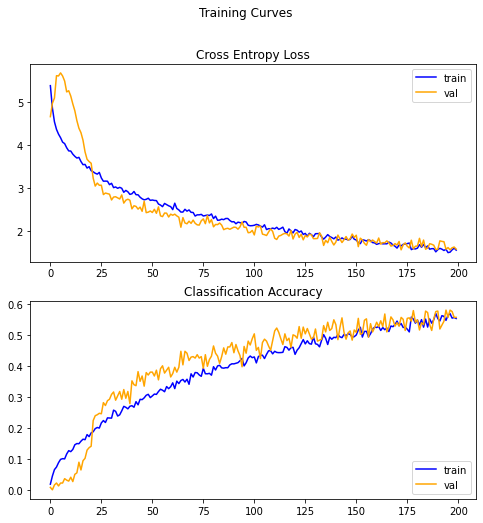


Test set evaluation metrics
30/30 [==============================] - 1s 25ms/step - loss: 1.6143 - accuracy: 0.5526
loss: 1.61
accuracy: 0.55


In [25]:
model_report(better_model4, better_model_history4, 30)

In [21]:
# VGG19_MODEL = init_VGG19_model(True)
# VGG19_MODEL_history = train_model(VGG19_MODEL, 80, 40, 10)
VGG16_MODEL = init_VGG16_model(True)
VGG16_MODEL_history = train_model(VGG16_MODEL, 40, 40, 10)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
40/40 [==============================] - 3s 66ms/step - loss: 4.7282 - accuracy: 0.0139 - val_loss: 4.3075 - val_accuracy: 0.0570
Epoch 2/40
40/40 [==============================] - 2s 60ms/step - loss: 4.3183 - accuracy: 0.0618 

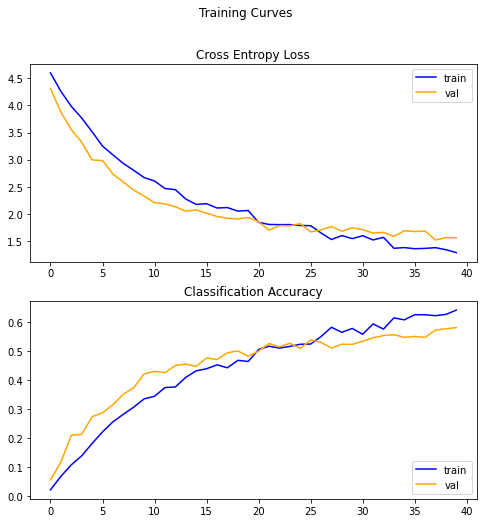


Test set evaluation metrics
50/50 [==============================] - 1s 18ms/step - loss: 1.5229 - accuracy: 0.5828
loss: 1.52
accuracy: 0.58


In [22]:
model_report(VGG16_MODEL, VGG16_MODEL_history, 50)

### Σύνοψη

Τα μοντέλα from scratch έχουν συγκρίσιμη απόδοση με τα μοντέλα Transfer learning. Τα μοντέλα Transfer learning μαθαίνουν πολύ πιο γρήγορα (μικρότερο αριθμό εποχών) δίοτι εμπεριέχουν την πληροφορία εξαγωγής χαρακτηριστικών των parent μοντέλων τους. 

Στο dataset Cifar-100 για classification προκύπτει σε ορισμένα μοντέλα overfitting. Γι αυτό είναι εξαιρετικά σημαντικό να εφαρμόσουμε μεθόδους αντιμετώπισης του overfitting όπως Dropout, early stopping και Data augmentation για να βελτιώσουμε την απόδοση του μοντέλου μας και την ικανότητα του να γενικεύει.

Σε μεγάλα dataset όπως το Cifar-100 πρέπει δωθεί μεγάλη έμφαση στην προεπεξεργασία των δεδομένων και την προετοιμασία πριν την διαδικασία της εκπαίδευσης. Υπάρχουν διάφορες μέθοδοι (ανεξάρτητες από το μοντέλο και τον optimizer) που βελτιώνουν την συνολική διαδικασία εκπαίδευσης όσον αφορά τον χρόνο και το χώρο που χρησιμοποιούμε κατά την εκπαίδευση. Στην συγκεκριμένη εργασία καταλήξαμε πως η χρήση TFRecords σε συνδιασμό με caching των δεδομένων είναι η καλύτερη επιλογή για να επιταχύνουμε την διαδικασία.

